# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [20]:
import random
import timeit
import matplotlib.pyplot as plt

N = 100 #num of points

data_jarvis_rand = [(random.randint(0, 32767), random.randint(0, 32767)) for _ in range(N)]

def orientation(p, q, r):
    return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1]) # det of 2x2 matrix (cp)

def jarvis_march(points): #trivial
    if len(points) < 3:
        return points

    leftmost = 0   #find the leftmost point (included in hull)
    for i in range(1, len(points)):
        if points[i][0] < points[leftmost][0]:
            leftmost = i

    hull = []   
    p = leftmost
    while True:
        hull.append(points[p])
        q = (p + 1) % len(points)
        for r in range(len(points)):
            # is r is more coutnerlockwise than q?
            if orientation(points[p], points[q], points[r]) > 0:
                q = r
        p = q  #move 

        if p == leftmost:  
            break

    return hull

# points = data_jarvis_rand
# convex_hull = jarvis_march(data_jarvis_rand)
# print("Convex Hull:", convex_hull)

    
# def run_test():
#     nums = []
#     hs = []
#     exe_times = []
#     for n in range(1000, 10000, 100):
#         rand_data = [(random.randint(0, 32767), random.randint(0, 32767)) for _ in range(n)]
#         nums.append(n)
#         hs.append(len(jarvis_march(rand_data)))
#         # Measure in milliseconds for clarity
#         exe_time_ms = timeit.timeit(lambda: jarvis_march(rand_data), number=1) * 1000
#         exe_times.append(exe_time_ms)

#     plt.figure(figsize=(10, 6))
#     for i in range(len(hs)):
#         plt.text(nums[i], exe_times[i], f"h={hs[i]}", fontsize=5, va='bottom')

#     plt.plot(nums, exe_times, marker='x', linestyle='-', color='b') 
#     plt.title('Execution Time per Trial')
#     plt.xlabel('Number of Points')  
#     plt.ylabel('Execution Time / milliseconds')  
#     plt.grid(True)
#     plt.show()

# run_test()

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [21]:
import math

def grahamscan(inputSet):
    '''
    Returns the list of points that lie on the convex hull (graham scan algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''

    #ADD YOUR CODE HERE
    if len(inputSet) < 3:
        return inputSet
    
    pivot = min(inputSet, key = lambda p: (p[1], p[0]))
 
    def orientation(p, q, r):
        return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    def polar_angle(p):
        return math.atan2(p[1] - pivot[1], p[0] - pivot[0])
    
    def distance(p):
        return ((p[0] - pivot[0]) ** 2 + (p[1] - pivot[1]) ** 2)
    
    sorted_points = sorted(inputSet, key = lambda p: (polar_angle(p), distance(p)))

    outputSet = [sorted_points[0], sorted_points[1]]

    for p in sorted_points[2:]:
        while len(outputSet) > 1 and orientation(outputSet[-2], outputSet[-1], p) <= 0:
            outputSet.pop()
        outputSet.append(p)

    return outputSet

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [22]:
# Merge Hulls algorithm
def merge_hulls(hull1, hull2):
    def next_index(hull, current):
        current = (current + 1) % len(hull)
        return current, hull[current]

    def prev_index(hull, current):
        current = (current - 1 + len(hull)) % len(hull)
        return current, hull[current]

    # Find the upper tangent
    p1_index, p1 = max(enumerate(hull1), key=lambda x: x[1][0])
    p2_index, p2 = min(enumerate(hull2), key=lambda x: x[1][0])

    done = False
    while not done:
        done = True
        while orientation(hull1[p1_index], hull2[p2_index], hull2[(p2_index + 1) % len(hull2)]) > 0:
            p2_index = (p2_index + 1) % len(hull2)
        while orientation(hull2[p2_index], hull1[p1_index], hull1[(p1_index - 1) % len(hull1)]) < 0:
            p1_index = (p1_index - 1) % len(hull1)
            done = False

    upper_tangent1 = p1_index
    upper_tangent2 = p2_index

    # Find the lower tangent
    p1_index, p1 = max(enumerate(hull1), key=lambda x: x[1][0])
    p2_index, p2 = min(enumerate(hull2), key=lambda x: x[1][0])

    done = False
    while not done:
        done = True
        while orientation(hull1[p1_index], hull2[p2_index], hull2[(p2_index - 1) % len(hull2)]) < 0:
            p2_index = (p2_index - 1) % len(hull2)
        while orientation(hull2[p2_index], hull1[p1_index], hull1[(p1_index + 1) % len(hull1)]) > 0:
            p1_index = (p1_index + 1) % len(hull1)
            done = False

    lower_tangent1 = p1_index
    lower_tangent2 = p2_index

    merged_hull = hull1[:upper_tangent1 + 1] + hull2[lower_tangent2:upper_tangent2 + 1] + hull1[lower_tangent1:]
    return merged_hull

# Chan's Algorithm
def chan(inputSet):
    if len(inputSet) < 3:
        return inputSet

    # Divide points into subsets
    subsets = []
    subset_size = 10  # Define subset size
    for i in range(0, len(inputSet), subset_size):
        subsets.append(inputSet[i:i+subset_size])

    # Apply Jarvis March or Graham Scan on each subset
    convex_hulls = []
    for subset in subsets:
        # Decide which algorithm to use based on the subset size
        if len(subset) < 20:
            convex_hulls.append(jarvis_march(subset))
        else:
            convex_hulls.append(grahamscan(subset))

    # Merge convex hulls using Merge Hulls algorithm
    while len(convex_hulls) > 1:
        merged = merge_hulls(convex_hulls.pop(), convex_hulls.pop())
        convex_hulls.append(merged)

    return convex_hulls[0]

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [34]:
import random

class TestDataGenerator():
    """
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE

    
    def __init__(self, num_points = 100, x_range = (0, 32767), y_range = (0,32767)):
        self.num_points = num_points
        self.x_range = x_range
        self.y_range = y_range
    
    def generate_points(self):
        return [(random.randint(self.x_range[0], self.x_range[1]), random.randint(self.y_range[0], self.y_range[1])) for _ in range(self.num_points)]

    def generate_best_case(self):
        # Generate points on a line or circle for best case
        # For example, let's generate points on a line
        return [(i, i) for i in range(self.num_points)]

    def generate_worst_case(self):
        # Generate points forming a complex shape for worst case
        # For example, let's generate points forming a circle with a hole
        radius_outer = min(self.x_range[1] - self.x_range[0], self.y_range[1] - self.y_range[0]) / 2
        radius_inner = radius_outer / 2
        center = ((self.x_range[1] + self.x_range[0]) // 2, (self.y_range[1] + self.y_range[0]) // 2)
        points = []
        for angle in range(0, 360, int(360 / self.num_points)):
            radian = angle * (3.14159 / 180)
            if angle % 2 == 0:
                radius = radius_outer
            else:
                radius = radius_inner
            x = center[0] + int(radius * math.cos(radian))
            y = center[1] + int(radius * math.sin(radian))
            points.append((x, y))
        return points



Use the cell below to implement the requested **experimental framework** API.

In [95]:
import timeit
import matplotlib

class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__(self, algorithms, data_generator, num_trials = 10):
        self.algorithms = algorithms
        self.data_generator = data_generator
        self.num_trials = num_trials
        self.results = {}
        self.sizes = []

    def run_experiment(self, sizes):
        self.sizes = sizes
        for size in sizes:
            self.data_generator.num_points = size
            for name, algorithm in self.algorithms.items():
                timer = timeit.Timer(lambda: algorithm(self.data_generator.generate_points()))
                time = timer.timeit(number = self.num_trials) / self.num_trials * 1000
                if name not in self.results:
                    self.results[name]=[]
                self.results[name].append(time)
    
    def plot_results(self, sizes):
        self.sizes = sizes
        plt.figure(figsize=(10, 6))
        for name, times in self.results.items():
            plt.plot(sizes, times, label = name)
        plt.xlabel("Input Size")
        plt.ylabel("Time (milliseconds)")
        plt.title("Convex Hull Algorithm Performance")
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_individual_results(self):
        for name, times in self.results.items():
            plt.figure(figsize=(10, 6))
            plt.plot(self.sizes, times, label = name, marker='o')
            plt.xlabel("Input Size")
            plt.ylabel("Time (milliseconds)")
            plt.title(f"{name} Performance")
            plt.legend()
            plt.grid(True)
            plt.show()

    def algorithm_timer(self, algorithm, data):
        start_time = timeit.default_timer()
        hull = algorithm(data)
        execution_time = (timeit.default_timer() - start_time) * 1000  # milliseconds
        return len(hull), execution_time

    def run_comparison(self):
        algorithms = {
            'Jarvis March': jarvis_march,
            'Graham Scan': grahamscan,
            'Chan\'s Algorithm': chan  # Ensure chan is defined elsewhere
        }
        
        nums = list(range(1000, 10000, 1000))
        results = {name: {'hull_sizes': [], 'execution_times': []} for name in algorithms.keys()}
        
        for n in nums:
            rand_data = [(random.randint(0, 32767), random.randint(0, 32767)) for _ in range(n)]
            for name, algorithm in algorithms.items():
                hull_size, execution_time = self.algorithm_timer(algorithm, rand_data)
                results[name]['hull_sizes'].append(hull_size)
                results[name]['execution_times'].append(execution_time)
        
        plt.figure(figsize=(12, 8))
        for name, data in results.items():
            execution_times = data['execution_times']
            hull_sizes = data['hull_sizes']
            plt.plot(nums, execution_times, marker='o', label=name)
            for i, (x, y) in enumerate(zip(nums, execution_times)):
                plt.text(x, y, f"{hull_sizes[i]}", fontsize=8)
        
        plt.title('Execution Time per Trial')
        plt.xlabel('Number of Points')
        plt.ylabel('Execution Time (milliseconds)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_complexity(self, max_size):
        sizes = list(range(10, max_size, 10))
        complexity_jarvis = [n * n for n in sizes]  # Пример сложности алгоритма Джарвиса (O(n * h))
        complexity_graham = [n * self.log_n(n) for n in sizes]  # Пример сложности алгоритма Грэхема (O(n * log n))
        complexity_chan = [n * self.log_n(n) for n in sizes]  # Пример сложности алгоритма Чена (O(n * log h))

        plt.figure(figsize=(10, 6))
        plt.plot(sizes, complexity_jarvis, label="Jarvis March")
        plt.plot(sizes, complexity_graham, label="Graham Scan", color='green')
        plt.plot(sizes, complexity_chan, label="Chan's Algorithm", color='green')
        plt.xlabel("Input Size (n)")
        plt.ylabel("Complexity")
        plt.title("Complexity of Convex Hull Algorithms")
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 22000)

        plt.text(sizes[-1], complexity_jarvis[-1], r'$O(n^2)$', verticalalignment='bottom', horizontalalignment='left', color='blue')
        plt.text(sizes[-1], complexity_graham[-1], r'$O(n \log n)$', verticalalignment='bottom', horizontalalignment='right', color='green')
        
        plt.show()
        plt.show()

    def log_n(self, n):
        result = 0
        while n > 1:
            result += 1
            n //= 2
        return result

    def plot_best_and_worst_case(self):
        best_cases = {}
        worst_cases = {}

        for name, algorithm in self.algorithms.items():
            # Generate best and worst case data
            best_data = self.data_generator.generate_best_case()
            worst_data = self.data_generator.generate_worst_case()

            # Run algorithm and measure time for best case
            timer_best = timeit.Timer(lambda: algorithm(best_data))
            time_best = timer_best.timeit(number=self.num_trials) / self.num_trials * 1000
            best_cases[name] = time_best

            # Run algorithm and measure time for worst case
            timer_worst = timeit.Timer(lambda: algorithm(worst_data))
            time_worst = timer_worst.timeit(number=self.num_trials) / self.num_trials * 1000
            worst_cases[name] = time_worst

        # Plot best case results
        plt.figure(figsize=(10, 6))
        plt.bar(best_cases.keys(), best_cases.values(), color='green')
        plt.xlabel("Algorithm")
        plt.ylabel("Time (milliseconds)")
        plt.title("Best Case Performance")
        plt.ylim(0, 6)  # Установка пределов по оси y для лучшего случая
        plt.grid(True)
        # Добавление меток с секундами над столбцами
        for algorithm, time in best_cases.items():
            plt.text(algorithm, time + 0.1, f"{time:.3f} ms", ha='center', va='bottom')
        plt.show()

        # Plot worst case results
        plt.figure(figsize=(10, 6))
        plt.bar(worst_cases.keys(), worst_cases.values(), color='red')
        plt.xlabel("Algorithm")
        plt.ylabel("Time (milliseconds)")
        plt.title("Worst Case Performance")
        plt.ylim(0, 6)  # Установка пределов по оси y для худшего случая
        plt.grid(True)
        # Добавление меток с секундами над столбцами
        for algorithm, time in worst_cases.items():
            plt.text(algorithm, time + 0.1, f"{time:.3f} ms", ha='center', va='bottom')
        plt.show()
  
    
    



Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

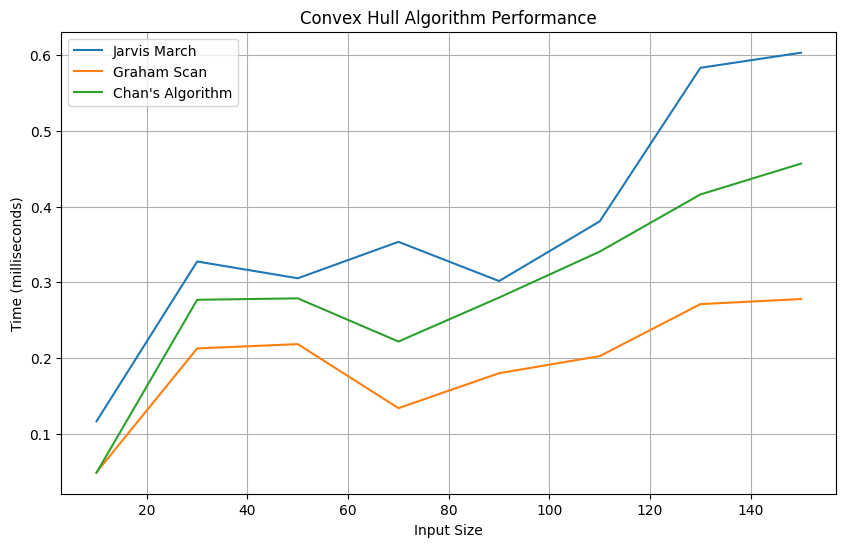

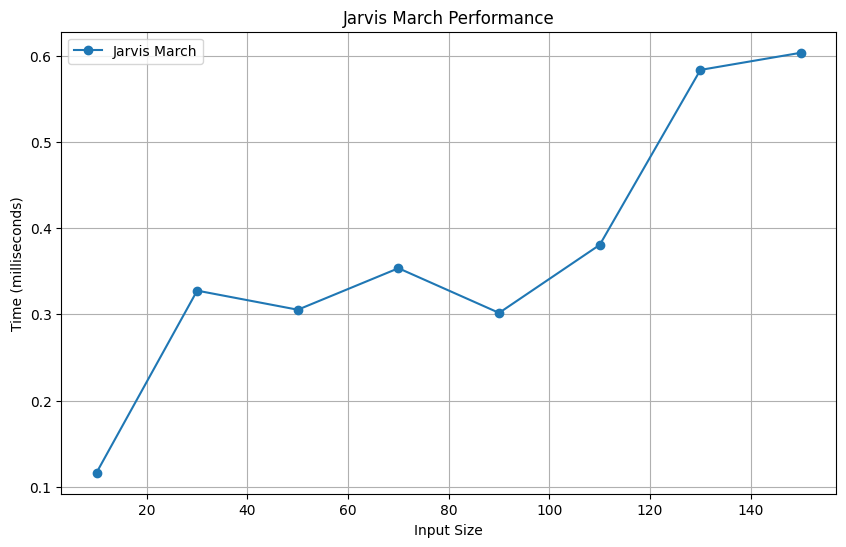

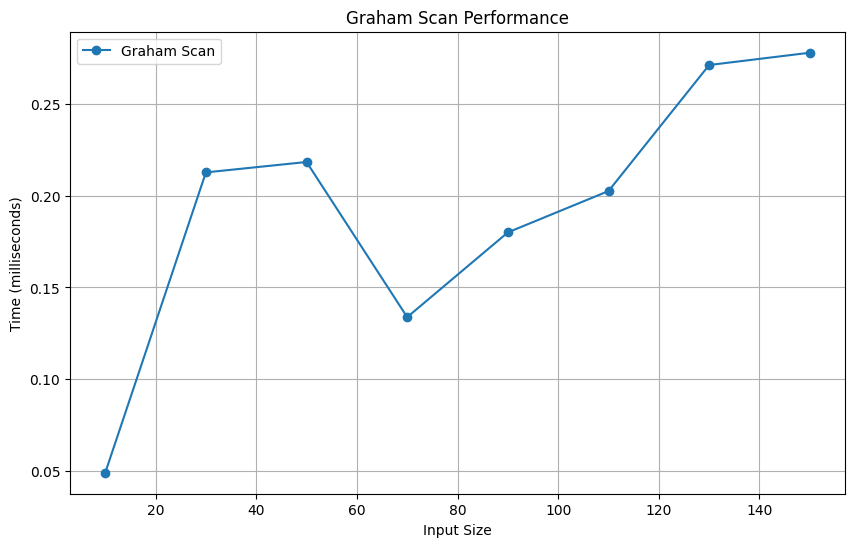

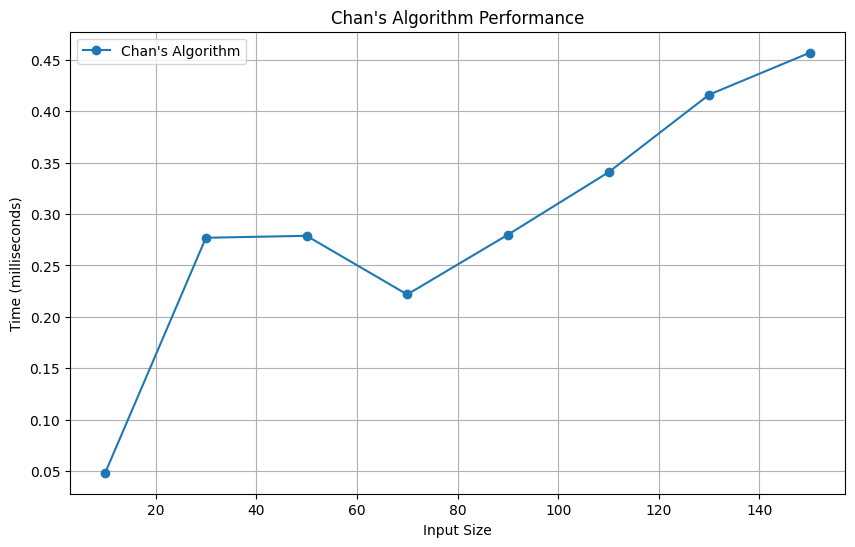

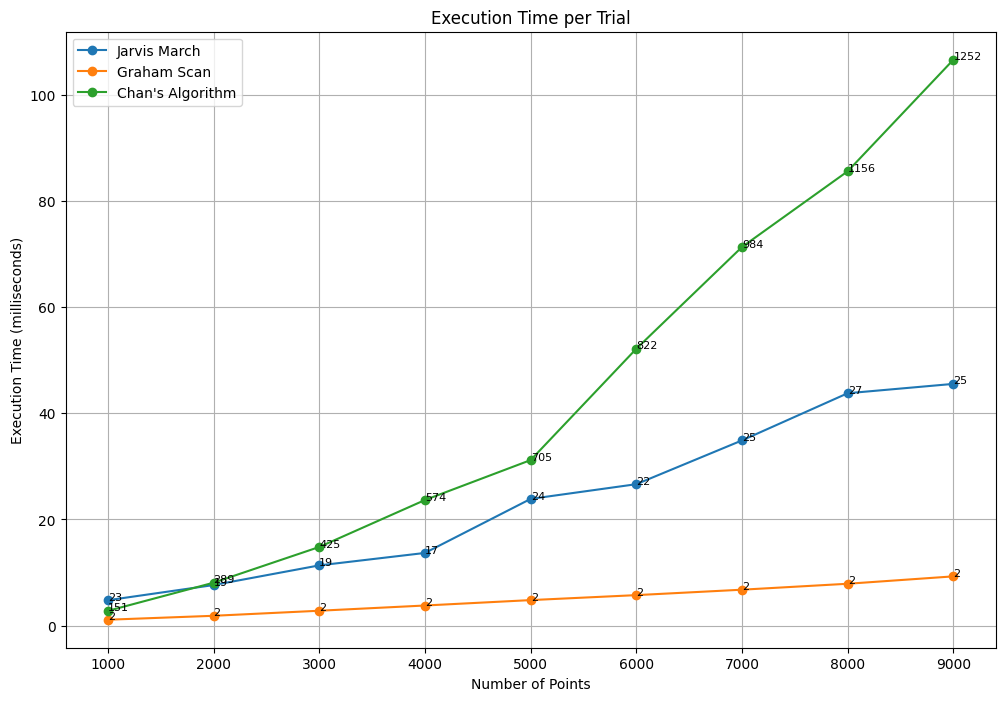

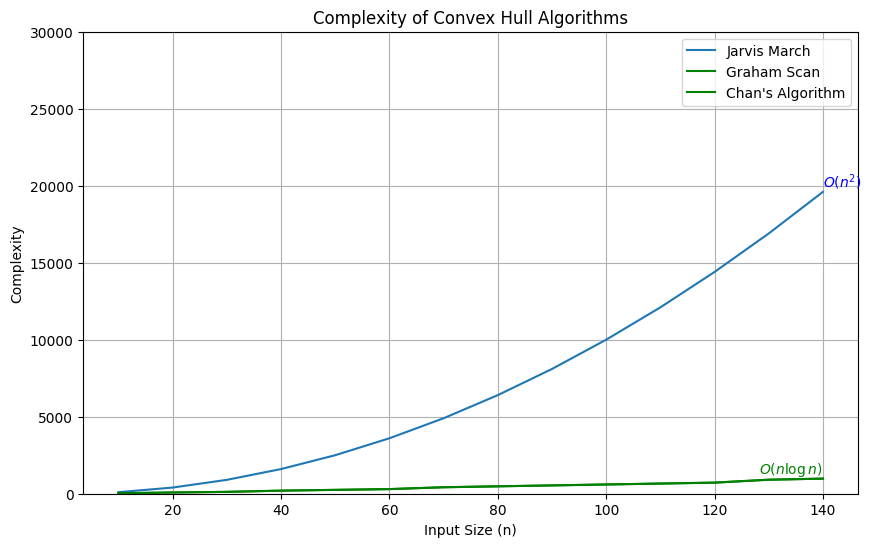

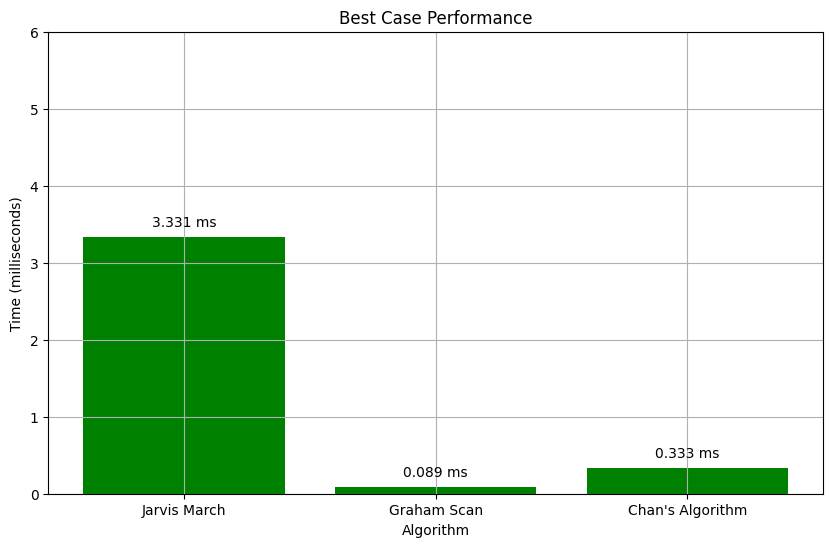

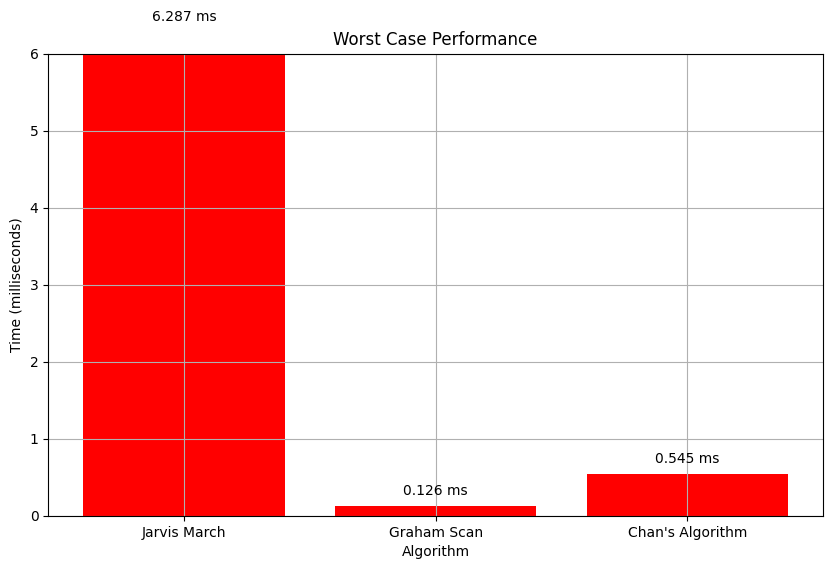

In [96]:
import random
# ADD YOUR TEST CODE HERE 
data_generator = TestDataGenerator()

algorithms = {
    "Jarvis March": jarvis_march,
    "Graham Scan": grahamscan,
    "Chan's Algorithm": chan
}

framework = ExperimentalFramework(algorithms, data_generator)

framework.run_experiment([10,30,50, 70, 90, 110, 130, 150])
framework.plot_results([10, 30, 50, 70, 90, 110, 130, 150])
framework.plot_individual_results()
framework.run_comparison()
framework.plot_complexity(150)
framework.plot_best_and_worst_case()